# **MODELAGEM E ESTIMATIVA DOS PARÂMETROS CINÉTICOS PARA PRODUÇÃO DE AMOXILINA**
### ***POR SÍNTESE ENZIMÁTICA EM BIORREATOR BATELADA E BATELADA ALIMENTADA***

In [2]:
# %pip install openpyxl
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import scipy

### Importando dados

In [3]:
df = pd.read_excel("ANN_amox/Semibat_convertido_clean.xlsx")
df.columns = ['Ester_t','Ester_gl','Ester_mM','Amox_t','Amox_gl','Amox_mM','APA_t','APA_gl','APA_mM','POHPG_t','POHPG_gl','POHPG_mM']
df

,Ester_t,Ester_gl,Ester_mM,Amox_t,Amox_gl,Amox_mM,APA_t,APA_gl,APA_mM,POHPG_t,POHPG_gl,POHPG_mM
0,9.859813,6.133333,34.040034,14.719626,0.883436,2.417722,10.163551,15.409471,71.254373,15.070093,-0.024540,-0.146805
1,20.017523,5.866667,32.560033,29.906542,1.262440,3.454954,19.976636,15.186630,70.223941,29.789720,0.368098,2.202071
2,29.827687,5.733333,31.820032,39.953271,1.546012,4.231013,30.140187,15.008357,69.399596,39.953271,0.417178,2.495680
3,39.986371,5.511111,30.586697,59.929907,2.110429,5.775669,39.953271,15.498607,71.666546,59.929907,0.736196,4.404142
4,50.145055,5.288889,29.353363,85.864486,2.797546,7.656119,49.766355,15.320334,70.842200,86.214953,0.073620,0.440414
5,59.973715,6.000000,33.300033,103.037383,3.067485,8.394868,59.929907,15.186630,70.223941,103.037383,1.079755,6.459408
6,70.132399,5.777778,32.066699,112.149533,3.042945,8.327709,69.742991,15.008357,69.399596,111.799065,0.858896,5.138165
7,80.292056,5.600000,31.080031,141.939252,3.558282,9.738047,79.906542,15.498607,71.666546,142.289720,0.809816,4.844556
8,90.103193,5.511111,30.586697,155.257009,3.975460,10.879749,90.070093,15.364903,71.048287,155.257009,1.055215,6.312603
9,100.261877,5.288889,29.353363,181.191589,4.073620,11.148384,100.233645,15.186630,70.223941,181.542056,1.128834,6.753017


### Extraindo dados relevantes

In [4]:
CAB_medida  = df.loc[:,'Ester_mM'].dropna().to_numpy()
CAN_medida = df.loc[:,'Amox_mM'].dropna().to_numpy()
CNH_medida = df.loc[:,'APA_mM'].dropna().to_numpy()
CAOH_medida = df.loc[:,'POHPG_mM'].dropna().to_numpy()
t_cab = df.loc[:,'Ester_t'].dropna().to_numpy().round(0)
t_can = df.loc[:,'Amox_t'].dropna().to_numpy().round(0)
t_cnh = df.loc[:,'APA_t'].dropna().to_numpy().round(0)
t_caoh = df.loc[:,'POHPG_t'].dropna().to_numpy().round(0)
tempo_substratos = t_cab
tempo_produtos = t_can

t_total = np.unique(np.sort(np.hstack([t_can,t_cab])))
t_total

array([ 10.,  15.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  86.,  90.,
       100., 103., 110., 112., 120., 130., 140., 142., 150., 155., 160.,
       170., 180., 181., 190., 191., 200., 210., 213., 220., 223., 230.,
       240., 250., 260., 266., 270., 276.])

In [5]:
fed_ab = np.array([5,10,15,21])

fed_ab_t = np.array([t_cab[fed_ab[0]],
                     t_cab[fed_ab[1]],
                     t_cab[fed_ab[2]],
                     t_cab[fed_ab[3]]])

fed_ab_c = np.array([CAB_medida[fed_ab[0]],
                     CAB_medida[fed_ab[1]],
                     CAB_medida[fed_ab[2]],
                     CAB_medida[fed_ab[3]]])
fed_ab = np.vstack([fed_ab_t,fed_ab_c])

fed_nh = np.array([3,7,11,16,21])

fed_nh_t = np.array([t_cnh[fed_nh[0]],
                     t_cnh[fed_nh[1]],
                     t_cnh[fed_nh[2]],
                     t_cnh[fed_nh[3]],
                     t_cnh[fed_nh[4]],
                     ])
fed_nh_c = np.array([CNH_medida[fed_nh[0]],
                     CNH_medida[fed_nh[1]],
                     CNH_medida[fed_nh[2]],
                     CNH_medida[fed_nh[3]],
                     CNH_medida[fed_nh[4]]])
fed_nh = np.vstack([fed_nh_t,fed_nh_c])

print(fed_nh)

[[ 40.          80.         120.         170.         220.        ]
 [ 71.66654602  71.66654602  71.87263242  71.66654602  72.28480522]]


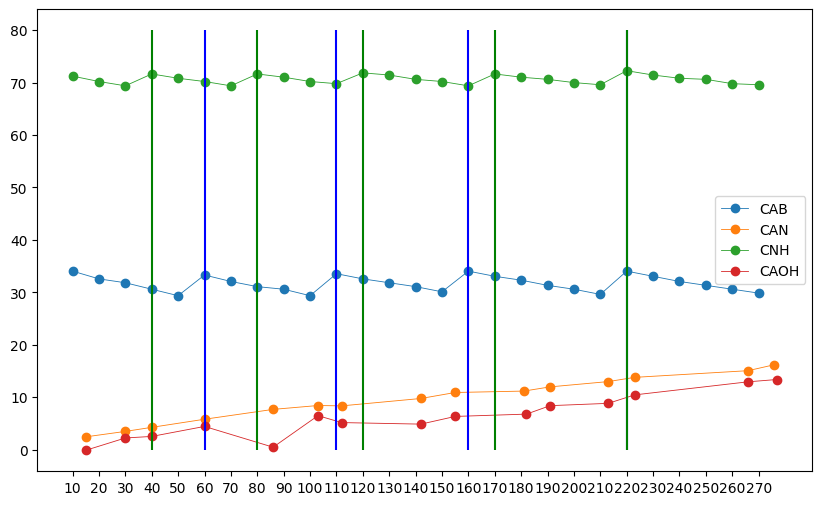

In [6]:
fig = plt.figure(figsize=(10,6))
plt.plot(t_cab, CAB_medida,'-o',linewidth=0.6)
plt.plot(t_can, CAN_medida,'-o',linewidth=0.6)
plt.plot(t_cnh, CNH_medida,'-o',linewidth=0.6)
plt.plot(t_caoh,CAOH_medida,'-o',linewidth=0.6)
plt.vlines(fed_ab_t,ymax=80,ymin=0,colors='blue')
plt.vlines(fed_nh_t,ymax=80,ymin=0,colors='green')
plt.legend(['CAB','CAN','CNH','CAOH'])
plt.xticks(t_cab);

### Parâmetros experimentais

In [7]:
Cez = 1
CAB_limite = 30     # ?
CNH_limite = 69.516 # ?

## **PARÂMETROS DE BIOPROCESSOS**
#### DISTRIBUIÇÃO A PRIORI

In [8]:
kcat1        = 0.181
kcat2        = 0.395
Km1          = 5.449
Km2          = 1.694
Tmax         = 0.824
Ken          = 7.947
kAB          = 0.682
kAN          = 1.989
kAOH         = 9.856
kNH          = 9.763

P = np.zeros(10)
P[0]   = kcat1    
P[1]   = kcat2    
P[2]   = Km1      
P[3]   = Km2      
P[4]   = Tmax     
P[5]   = Ken      
P[6]   = kAB      
P[7]   = kAN      
P[8]   = kAOH     
P[9]  = kNH 

Np = len(P)

## Condições Iniciais

In [9]:
CI = np.array([CAB_medida[0],CAN_medida[0],CNH_medida[0],CAOH_medida[0]])

# Modelos Matemáticos

In [10]:
def enzymic_amox(t,y, 
kcat1,
kcat2,
Km1,
Km2,  
Tmax, 
Ken,  
kAB,  
kAN,  
kAOH, 
kNH):
    FAB = 0
    FNH = 0 
    
    CAB = y[0]
    CAN = y[1]
    CNH = y[2]
    CAOH = y[3]

    # Consumo de ester
    VAB = (kcat1*CAB*Cez)/((Km1*(1 + (CAN/kAN) + (CAOH/kAOH))) + CAB)
    
    # Hidrolise de amoxicilina
    VAN = (kcat2*CAN*Cez)/((Km2*(1 + (CAB/kAB) + (CNH/kNH) + (CAOH/kAOH))) + CAN)
    
    # Enzima saturada com 6-apa
    X   = CNH/(Ken + CNH)
    
    # Sintese enzimatica
    VS  = VAB*Tmax*X

    # Hidrolise de ester
    Vh1 = (VAB - VS) 

    dy = np.zeros(4)

    # C. ester
    dy[0] = ((-(VS - VAN) - (Vh1 + VAN)) + FAB) 
    
    # C. amox
    dy[1] = (VS - VAN)                         
    
    # C. 6-apa
    dy[2] = (-(VS - VAN) + FNH)                
    
    # C. POHPG
    dy[3] =  (Vh1 + VAN)
    
    return np.array(dy)                                           

##### Simulação da Função ode15s do Matlab

In [11]:
def ode15s_amox(P, CI, t):
    return scipy.integrate.solve_ivp(enzymic_amox,t_span=(t_total[0],t_total[-1]),t_eval=t_total,y0=CI,method='BDF',args=P)

In [12]:
def ode15s_amox_fed(P,CI,t,fed_ab,fed_nh):
    fed_t = np.unique(np.sort(np.hstack([fed_ab[0],fed_nh[0]])))
    CI_ode = CI
    all_t = []
    for i,fed in enumerate(fed_t):
        all_t.insert(i,[])
        count = 0
        for p in t:
            all_t[i].append(p)
            count += 1
            if p == fed:
                break
        t = t[count-1:]
    all_t.append(t)

    final_Y = np.zeros([4,1])
    for t in all_t:
        Y = scipy.integrate.solve_ivp(enzymic_amox,t_span=(t[0],t[-1]),t_eval=t,y0=CI_ode,method='BDF',args=P)
        Y = Y.y
        CI_ode = Y[:,-1]
        if t[-1] in fed_ab[0]:
            CI_ode[0] = fed_ab[1][list(fed_ab[0]).index(t[-1])]
        if t[-1] in fed_nh[0]:
            CI_ode[2] = fed_nh[1][list(fed_nh[0]).index(t[-1])]
        final_Y = np.hstack([final_Y,Y[:,:-1]]) 
    final_Y = np.hstack([final_Y,Y[:,-1].reshape(-1,1)])
    final_Y = np.delete(final_Y,0,1)
    return final_Y

In [13]:
Y = ode15s_amox_fed(P,CI,t_total,fed_ab,fed_nh)
print(Y.shape)
CAB_ref   =  Y[0,:]      
CAN_ref   =  Y[1,:]    
CNH_ref   =  Y[2,:]      
CAOH_ref  =  Y[3,:]

(4, 39)


##### Desvio das medidas de referência

In [14]:
desvio_CAB =  0.1*max(CAB_ref) 
desvio_CAN =  0.1*max(CAN_ref)
desvio_CNH =  0.1*max(CNH_ref)
desvio_CAOH = 0.1*max(CAOH_ref)

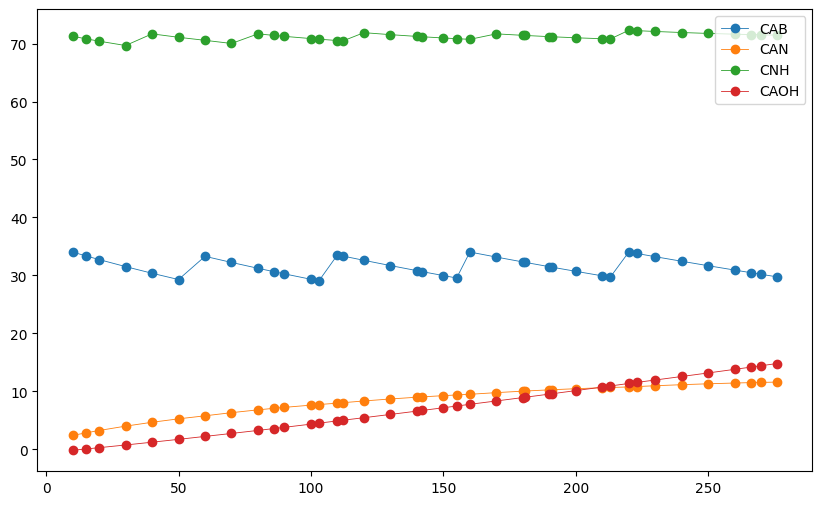

In [15]:
fig = plt.figure(figsize=(10,6))
plt.plot(t_total,CAB_ref,'-o',linewidth=0.6)
plt.plot(t_total,CAN_ref,'-o',linewidth=0.6)
plt.plot(t_total,CNH_ref,'-o',linewidth=0.6)
plt.plot(t_total,CAOH_ref,'-o',linewidth=0.6)
plt.legend(['CAB','CAN','CNH','CAOH'])

## Cadeia de Markov

In [16]:
N         = 100000     #Número de estados da cadeia

waux      = 6e-3 
media_g   = 1       #Média gaussiana
desviop_g = 0.6     #Desvio dos parâmetros ao utilizar priori gaussian

In [17]:
estimate = [i for i in range(9)]
Nfix = len(estimate)
media_MCMC = 1*P      
desvio_P = 0.00002*P    

p_ref = P                   
p_old = P                     

p_old      = P   
media_MCMC = media_g*P
desvio_P   = desviop_g*P

w = np.ones((1,Np))   
w = w*waux  

parametro_exato = (p_ref*np.ones((N,1))).T
print(parametro_exato)

[[0.181 0.181 0.181 ... 0.181 0.181 0.181]
 [0.395 0.395 0.395 ... 0.395 0.395 0.395]
 [5.449 5.449 5.449 ... 5.449 5.449 5.449]
 ...
 [1.989 1.989 1.989 ... 1.989 1.989 1.989]
 [9.856 9.856 9.856 ... 9.856 9.856 9.856]
 [9.763 9.763 9.763 ... 9.763 9.763 9.763]]


In [18]:
aceitacao    = np.zeros((1,N))  
cadeia       = np.zeros((Np,N)) 
conv_likeli  = np.zeros((1,N))
k=0

##### Inicio do MCMC

In [19]:
Y = ode15s_amox_fed(p_old,CI,t_total,fed_ab,fed_nh)

tempo_produtos = [1, 3, 4, 6, 9, 12, 14, 18, 20, 24, 26, 29, 31, 36, 38]
tempo_substratos = [0, 2, 3, 4, 5, 6, 7, 8, 10, 11, 13, 15, 16, 17, 19, 21, 22, 23, 25, 27, 28, 30, 32, 33, 34, 35, 37]

CAB  = Y[0,tempo_substratos]
CAN  = Y[1,tempo_produtos] 
CNH  = Y[2,tempo_substratos]
CAOH = Y[3,tempo_produtos] 



Lk_1 = np.dot((CAB_medida - CAB.T),(CAB_medida - CAB.T).T) / (desvio_CAB**2)        ; 
Lk_2 = np.dot((CAN_medida - CAN.T),(CAN_medida - CAN.T).T) / (desvio_CAN**2)       ;  
Lk_3 = np.dot((CNH_medida - CNH.T),(CNH_medida - CNH.T).T) / (desvio_CNH**2)        ;
Lk_4 = np.dot((CAOH_medida - CAOH.T),(CAOH_medida - CAOH.T).T) / (desvio_CAOH**2)   ;
    
lk_old = Lk_1  + Lk_2 + Lk_3 + Lk_4           
prior_old = np.sum((((p_old - media_MCMC))/((desvio_P)**2)))


# Guardando vetor de parâmetros estimados
cadeia[:,1] = p_old



#### MCMC

In [20]:
import random
# Contador para verificar a aceitação
k=0
for i in range(0, N):  # Python index starts at 0, MATLAB at 1
    progress = (i / N) * 100
    print(f"Progress: {progress}%",end='\r')

    # New parameter vector
    P_new = p_old + w * np.random.randn(Np) * p_old
    # Simulate using ODE solver
    Y = ode15s_amox_fed(P_new[0], CI,t_total,fed_ab,fed_nh)
    
    CAB  = Y[0,tempo_substratos]
    CAN  = Y[1,tempo_produtos] 
    CNH  = Y[2,tempo_substratos]
    CAOH = Y[3,tempo_produtos] 

    # Calculate new prior
    Prior_new = np.sum(((P_new - media_MCMC) / desvio_P) ** 2)

    # Likelihood calculations
    Lk_1 = np.dot((CAB_medida - CAB.T),(CAB_medida - CAB.T).T) / (desvio_CAB**2)        
    Lk_2 = np.dot((CAN_medida - CAN.T),(CAN_medida - CAN.T).T) / (desvio_CAN**2)         
    Lk_3 = np.dot((CNH_medida - CNH.T),(CNH_medida - CNH.T).T) / (desvio_CNH**2)        
    Lk_4 = np.dot((CAOH_medida - CAOH.T),(CAOH_medida - CAOH.T).T) / (desvio_CAOH**2)   
 
    Lk_new = Lk_1 + Lk_2 + Lk_3 + Lk_4

    # MCMC acceptance check
    if np.log(random.random()) < (-0.5 * (Lk_new + Prior_new - lk_old - prior_old)):
        p_old = P_new
        lk_old = Lk_new
        Prior_old = Prior_new
        k += 1

    # Store results
    aceitacao[0,i] = k
    cadeia[:, i] = p_old
    conv_likeli[0,i] = lk_old + Prior_old


### Visualização das cadeias

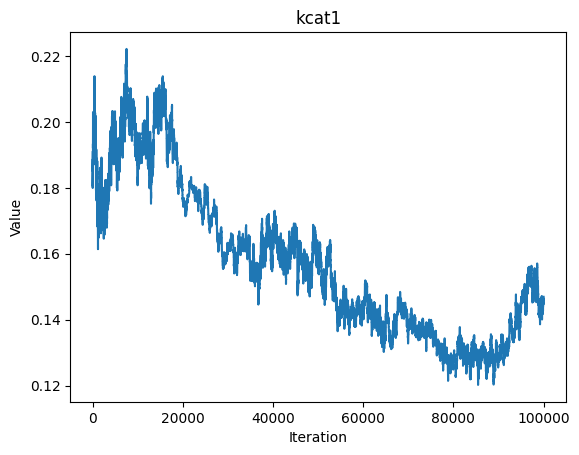

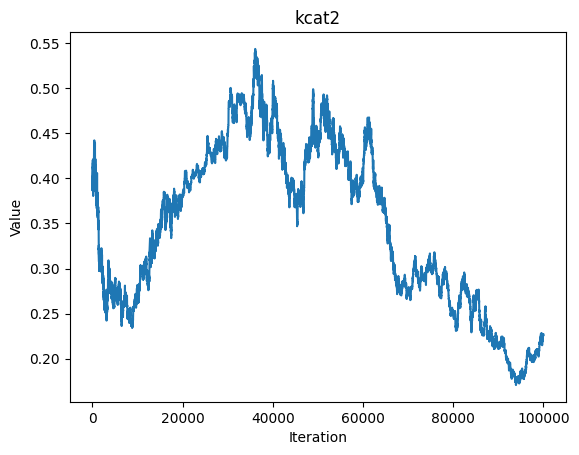

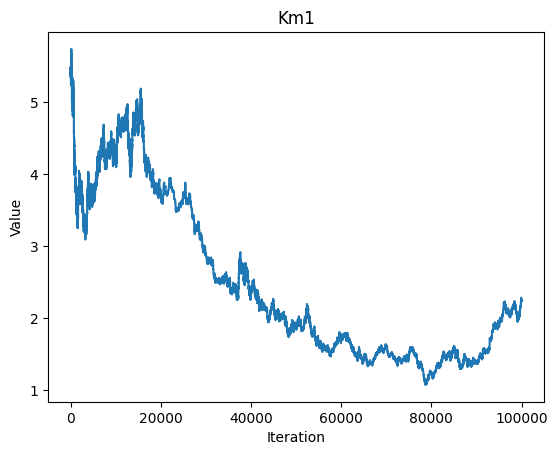

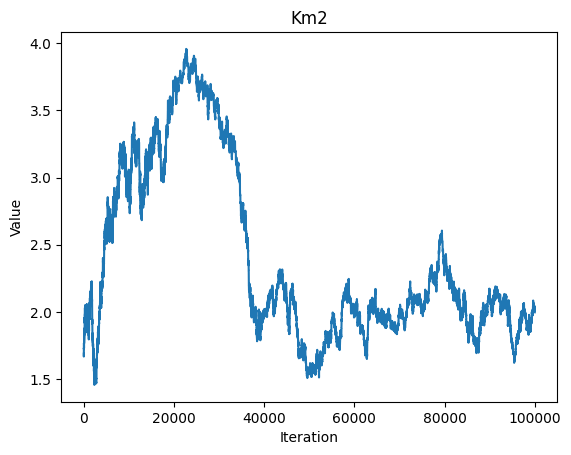

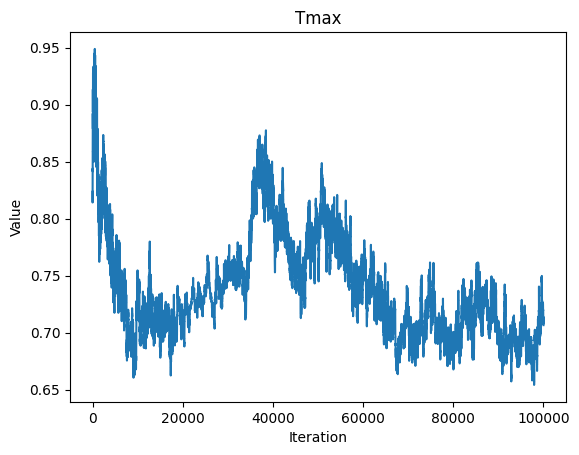

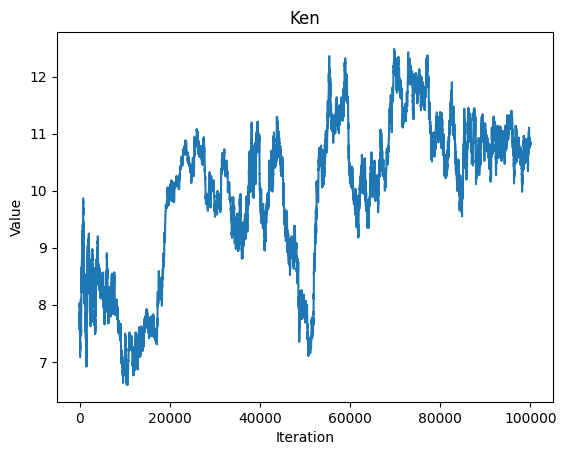

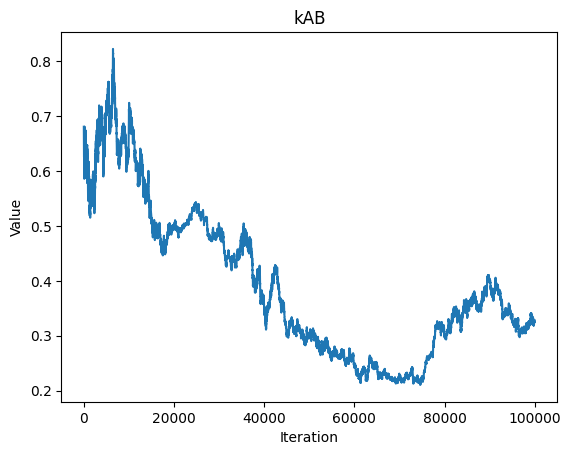

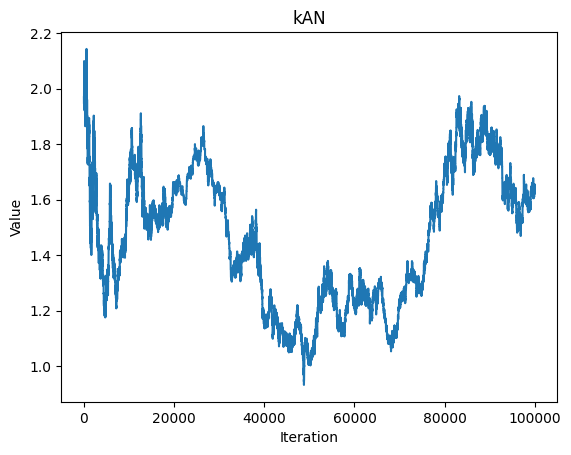

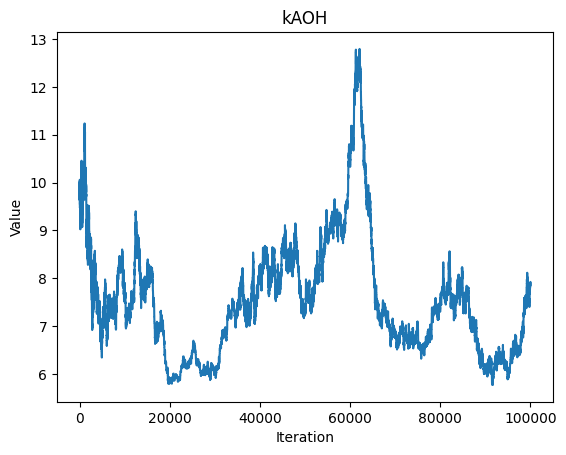

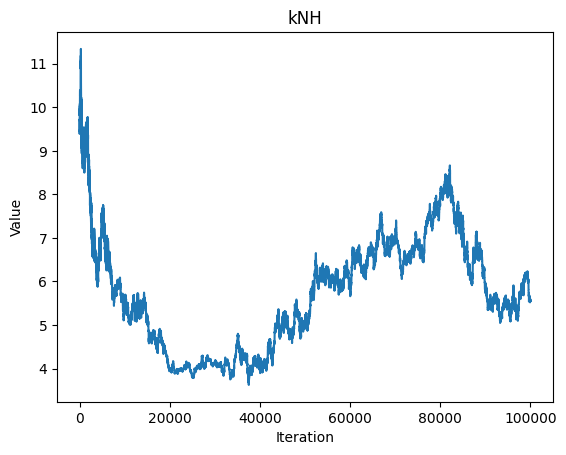

In [28]:

labels = ['kcat1',
'kcat2',
'Km1',
'Km2',  
'Tmax', 
'Ken',  
'kAB',  
'kAN',  
'kAOH', 
'kNH']
for i in range(len(labels)):
    fig,ax = plt.subplots()
    ax.plot(cadeia[i,:])
    ax.set_title(labels[i])
    ax.set_ylabel("Value")
    ax.set_xlabel("Iteration")
    plt.savefig(f"./chains/{labels[i]}_mc.png",dpi=300)


# Comparação dados experimentais X dados modelo

In [29]:
# Aquecimento
aq = int(0.9 * N)  # Starting index for the burn-in period
IC = 0.99          # Confidence interval level

# Confidence interval bounds
xaux = (1 - IC) / 2
IC_inf = xaux
IC_sup = 1 - xaux

# Initialize the response table
Nfix = len(estimate)  # Number of parameters to estimate
Tabela_resp = np.zeros((Nfix, 4))  # Table with 4 columns

for i in range(Nfix):
    ii = estimate[i]
    
    # Reference value for the parameter
    Tabela_resp[i, 0] = p_ref[ii]
    # Mean of the chain post-burn-in
    Tabela_resp[i, 1] = np.mean(cadeia[ii, aq:])
    
    # Quantiles for the confidence interval
    y = np.quantile(cadeia[ii, aq:], [IC_inf, IC_sup])
    Tabela_resp[i, 2] = y[0]
    Tabela_resp[i, 3] = y[1]

print("Analysis complete. Results stored in Tabela_resp.")
print(Tabela_resp)

Analysis complete. Results stored in Tabela_resp.
[[ 0.181       0.14157375  0.12765104  0.15594295]
 [ 0.395       0.19861957  0.17248735  0.22696739]
 [ 5.449       1.86195535  1.36759937  2.25669842]
 [ 1.694       1.96718499  1.63483185  2.17761581]
 [ 0.824       0.6946318   0.65957081  0.74188816]
 [ 7.947      10.79619546 10.13792052 11.33651077]
 [ 0.682       0.34080203  0.30002422  0.4016867 ]
 [ 1.989       1.65322171  1.48159659  1.85347327]
 [ 9.856       6.52229435  5.80428677  8.02307521]]


Text(0, 0.5, 'mM')

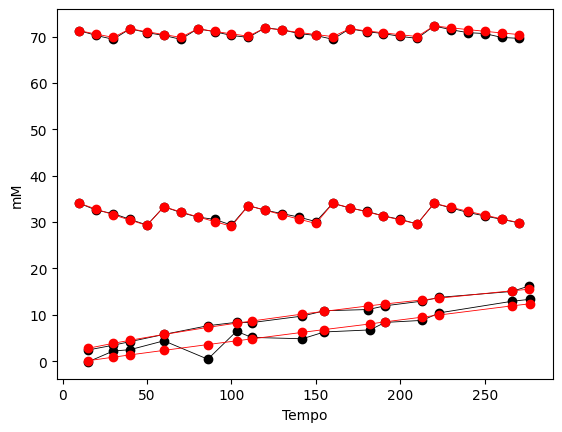

In [30]:
from sklearn.metrics import r2_score 

fig = plt.figure()
plt.plot(t_cab, CAB_medida,'-ok',linewidth=0.6)
plt.plot(t_can, CAN_medida,'-ok',linewidth=0.6)
plt.plot(t_cnh, CNH_medida,'-ok',linewidth=0.6)
plt.plot(t_caoh,CAOH_medida,'-ok',linewidth=0.6)
plt.plot(t_cab, CAB,'-or',linewidth=0.6)
plt.plot(t_can, CAN,'-or',linewidth=0.6)
plt.plot(t_cnh, CNH,'-or',linewidth=0.6)
plt.plot(t_caoh, CAOH,'-or',linewidth=0.6)
plt.xlabel('Tempo')
plt.ylabel('mM')

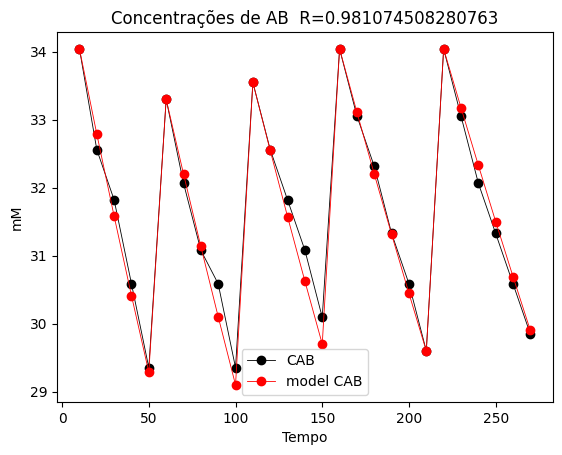

In [31]:
fig = plt.figure()
plt.plot(t_cab, CAB_medida,'-ok',linewidth=0.6)
plt.plot(t_cab, CAB,'-or',linewidth=0.6)
plt.title(f'Concentrações de AB  R={r2_score(CAB_medida,CAB)}')
plt.legend(['CAB','model CAB'])
plt.xlabel('Tempo')
plt.ylabel('mM');

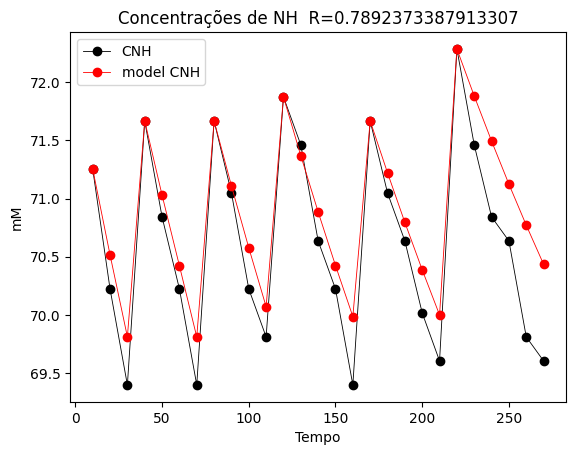

In [32]:
fig = plt.figure()
plt.plot(t_cnh, CNH_medida,'-ok',linewidth=0.6)
plt.plot(t_cnh, CNH,'-or',linewidth=0.6)
plt.title(f'Concentrações de NH  R={r2_score(CNH_medida,CNH)}')
plt.legend(['CNH','model CNH']);
plt.xlabel('Tempo')
plt.ylabel('mM');

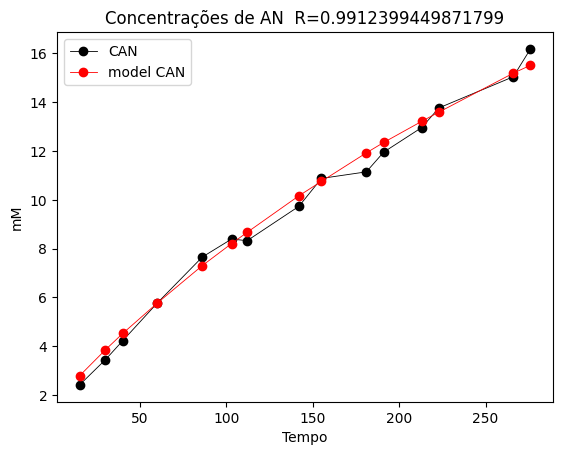

In [33]:
fig = plt.figure()

plt.plot(t_can, CAN_medida,'-ok',linewidth=0.6)
plt.plot(t_can, CAN,'-or',linewidth=0.6)
plt.title(f'Concentrações de AN  R={r2_score(CAN_medida,CAN)}')
plt.legend(['CAN','model CAN']);
plt.xlabel('Tempo')
plt.ylabel('mM');

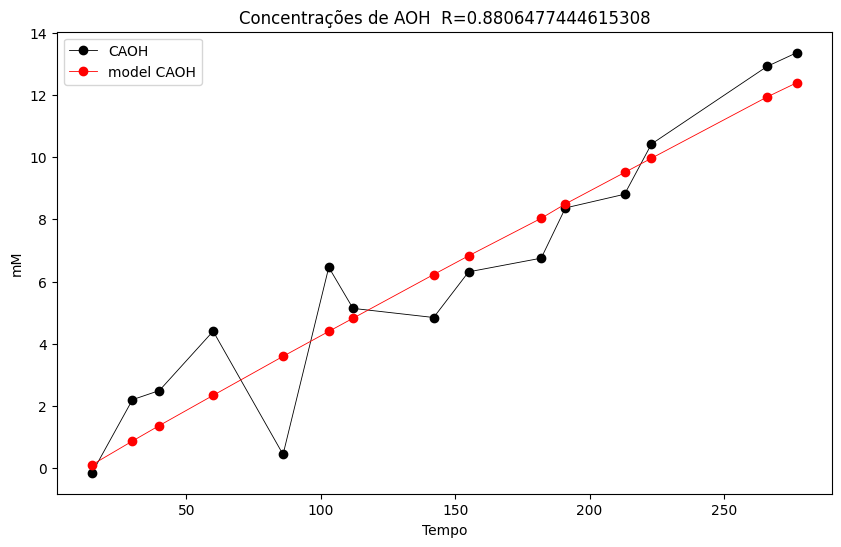

In [34]:
fig = plt.figure(figsize=(10,6))

plt.plot(t_caoh,CAOH_medida,'-ok',linewidth=0.6)
plt.plot(t_caoh, CAOH,'-or',linewidth=0.6)
plt.title(f'Concentrações de AOH  R={r2_score(CAOH_medida,CAOH)}')
plt.legend(['CAOH','model CAOH'])
plt.xlabel('Tempo')
plt.ylabel('mM');